# Programming for Data Analysis Assignment

# Assignment Brief 
For this project you must create a data set by simulating a real-world phenomenon of your choosing. You may pick any phenomenon you wish – you might pick one that is of interest to you in your personal or professional life. Then, rather than collect data
related to the phenomenon, you should model and synthesise such data using Python. We suggest you use the numpy.random package for this purpose.
Specifically, in this project you should:
- Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.
- Investigate the types of variables involved, their likely distributions, and their relationships with each other.
- Synthesise/simulate a data set as closely matching their properties as possible.
- Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.

**Note that this project is about simulation – you must synthesise a data set. Some students may already have some real-world data sets in their own files. It is okay to base your synthesised data set on these should you wish (please reference it if you do), but the main task in this project is to create a synthesised data set.**

Numpy’s random number routines produce pseudo random numbers using combinations of a BitGenerator to create sequences and a Generator to use those sequences to sample from different statistical distributions [^1].

[^1]:(https://numpy.org/doc/stable/reference/random/index.html#module-numpy.random).


# PROJECT SUBJECT
I work in a pharmacy so I'm thinking of analysing the number of monthly dispensings per individual by looking at variables such as age, scheme type (gms, dps, pr), maybe whether there is a longterm illness and activity levels (maybe in steps), could think about seasonally impact (eg winter flus, immune suppresion)

A useful reference article that discusses the pharmacy related data held by the HSE PCRS (Irish Health Service Executive-Primary Care Reimbursement Service) is the article [Pharmacoepidemiology resources in Ireland—an introduction to pharmacy claims data] (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5662670/) 

Link to the [HSE PCRS annual reports](https://www.sspcrs.ie/portal/annual-reporting/) 

The aricle by *Sinnott et al.* 2017 states that in 2015, almost 40% of the population (1.7 million people) were in receipt of public health insurance, or covered by the GMS scheme (known as medical card holders). Qualification for the GMS scheme is on the basis of income-related means-testing. According to the PCRS annual report this number was approx 30% or 1.5 million people at the end of 2021.

The remainder of the population not covered by the GMS scheme are referred to as being in the “private” tier. Individuals in the private health care system can receive government-subsidised access to prescription medications through the DP scheme. Under the DP scheme, an individual or a family is responsible for paying up to €80 per month for their medications. In 2014, 29% of the population accessed medication under this scheme [1](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5662670/). According to the PCRS annual report 38.2% of the population accessed medication through the GMS or the LTI (Long Term Illness) scheme.6.16% of the population used the DP scheme (308,000 people)


An article published in [Real World Analytics pharmacy](https://www.realworldanalytics.com/pharmacy/en-ie/news/its-time-for-the-irish-healthcare-industry-to-step-into-the-data-driven-era/) which discusses the lack of available data from pharmacies in 2017 has indicated that the simulating of a dataset based on the availabilty of  Irish healthcare data may be hindered due to the Irish healtcare system publishing out of date and summarised data in comparison to, for example, the UK which through thr NHS publish payment data in its entirety about how each pharmacy and has performed each month. 

In Ireland, there are over 1,800 community pharmacies with the typical patient visiting a community pharmacy 19 times a year.

Refernces [Creating simulated data for classifications in Python](https://www.projectpro.io/recipes/create-simulated-data-for-classification-in-python)
[Simulations in Python](https://discovery.cs.illinois.edu/learn/Simulation-and-Distributions/Simple-Simulations-in-Python/)

From the [PCRS Annual reporting website](https://www.sspcrs.ie/analytics/saw.dll?PortalPages) I have saved the data of the number of items claimed per pharmacy for 2021 as csv file to examine the distibuution so that I can simulate the data


In [14]:
#testing import of the items per claim form
import csv

filename = "Analysis_Number_of_Items_per_Claim_Form.csv"

with open(filename, "rt") as csvfile:
    csvReader = csv.reader(csvfile,delimiter=",")
    for line in csvReader:
        print (line[2])


ITEM_DESC
1
2
3
4
5
6
7
8+


In [15]:
Numpy’s random number routines produce pseudo random numbers using combinations of a BitGenerator to create sequences and a Generator to use those sequences to sample from different statistical distributions#To create a text file that has removed the commas
txt_file = "Analysis_Number_of_Items_per_Claim_Form.txt"
text_list = []

with open(filename, "r") as my_input_file:
    for line in my_input_file:
        line = line.split(",", 5) #This CSV file contains five 
        #fields: sepallength sepalwidth petallength,petalwidth,class which are delimited by commas. 
        text_list.append(" ".join(line))

with open(txt_file, "w") as my_output_file:
    my_output_file.write("#1\n")
    my_output_file.write("double({},{})\n".format(len(text_list), 5))
    for line in text_list:
        my_output_file.write("  " + line)
    print('File Successfully written.')

File Successfully written.


In [16]:
import pandas as pd
import seaborn as sns #data visualisation library
import matplotlib.pyplot as plt # allow me to plot the data
import numpy as np

In [22]:
NoOfItems_df=pd.read_csv("Analysis_Number_of_Items_per_Claim_Form.csv")
print (NoOfItems_df)

     YR SCHEME ITEM_DESC  TOTAL_CLAIMS   PERC  REPORT_ORDER
0  2021    GMS         1       7484226  40.69             1
1  2021    GMS         2       3168107  17.22             2
2  2021    GMS         3       1785109   9.70             3
3  2021    GMS         4       1255472   6.83             4
4  2021    GMS         5       1003850   5.46             5
5  2021    GMS         6        847085   4.61             6
6  2021    GMS         7        691107   3.76             7
7  2021    GMS        8+       2159518  11.74             8


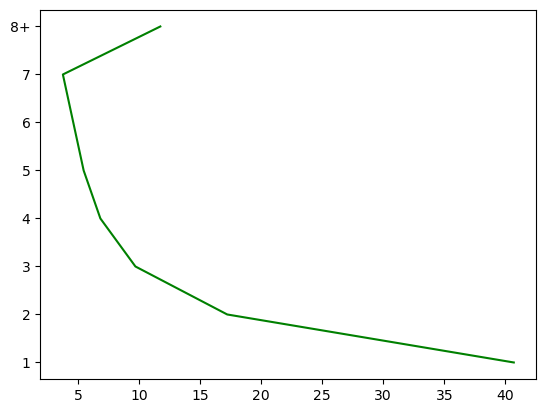

In [32]:
x = NoOfItems_df["PERC"]
y = NoOfItems_df["ITEM_DESC"]
plt.plot(x, y, color = "green")


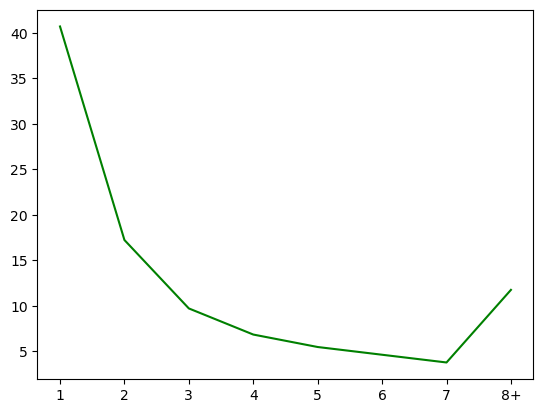

In [33]:
y = NoOfItems_df["PERC"]
x = NoOfItems_df["ITEM_DESC"]
plt.plot(x, y, color = "green")


Data sources
    A number of different types of data can be used in analyses of medicine utilization and expenditure. Data sources are divided into aggregated data and patient-level data. Aggregated data sets are those where the data are compiled as a summary statistic. For example, the number of units of stock of a medicine purchased each month or each year. Aggregated data do not include information on the provision of medicines to an individual person. Patient-level data are those where
information on individual patients is available.
[Methods to analyse medicine utilization and expenditure
to support pharmaceutical policy implementation](https://apps.who.int/iris/bitstream/handle/10665/274282/9789241514040-eng.pdf)

In planning an analysis, it worth considering what measure of medicine use is required. Measures of medicine use can include an assessment of the amount of medicine procured, prescribed, supplied or used. The unit of measurement can include counts, volume or cost, and all of these units can be expressed as rates. The relevant population is commonly used as the denominator where rates are calculated.
Another consideration for determining what analyses to undertake is the data set available. Many of the key questions to support pharmaceutical policy can be answered using aggregated data, particularly where the data are available for the whole programme or where the data sample is representative of the programme. Some questions can only be answered using patientlevel data and so cannot be answered if only aggregated data sets are available. 

# **Dispensing data**  
**Description:** Data on licensed medicines supplied to a patient by a dispensing officer (pharmacist or a doctor in  dispensing practice).
    
**Potential data sources:**
* pharmacies,
* medicine outlets or doctor dispensing practice records
(electronic or manual form).
  Where reimbursement of dispensing occurs, centralized data might be held by the payer (i.e. private insurer or government).
  
**Information usually available:**
* patient identifier,
* name of medicine dispensed,
* dosage form,
* strength,
* quantity of medicines dispensed,
* cost of each medicine dispensed.

**Advantages:** There is often a legal requirement to document dispensing, thus data are usually recorded at the patient level. The data might include overthe-counter medicines and medicines supplied by a pharmacist that do not require a prescription from a physician but do require a dispensing record.A routine audit of all medicines dispensed by a representative sample of pharmacies in a country will provide a comprehensive database of all types of medicines.
**Limitations:** The quantity of medicines dispensed will be subject to availability and this may vary depending on the procurement practice. In many instances, the data do not contain information about the problem, condition or diagnosis for which the medicines are dispensed, however, this is available in some data sets. Data may or may not be able to be linked to a prescriber.The data do not take into account compliance with therapy, thus dispensing data may not reflect the actual use (consumption) of medicines

***

# **Health claims data**
**Description:** Health claims data for medicines that are subsidized or reimbursed by the government or private insurers.
  
**Potential data sources:**
  - data held in either electronic or paper form by insurersmor agencies subsidizing medicine costs; insurers maymbe private health insurance companies or government agencies.

**Information usually available:**
* name of medicine,
* dosage form,
* strength,
* quantity of medicine dispensed,
* cost of each medicine dispensed.

**Advantages:** The data provide information about aggregated medicine utilization for the insured population. Data may allow analyses at different levels of the health system (e.g. regional, national or individual). While not included in all data sets, some contain unique patient identifiers enabling patient-level analyses to be done.

**Limitations:** The data are collected for administrativepurposes and thus may not include all relevant information for studies on medicine utilization. Data do not usually include over-the-counter medicines or prescribed medicines that are not subsidized or reimbursed. There are no data on medicines prescribed but never dispensed. The data are limited to the people covered by the subsidy or reimbursement programme, thus those segments of the population that are not covered by the programme are excluded. The databases do not capture information on medicines that are not covered by the subsidy or reimbursement programme.

***


Total number of dispensed items per month of the year and relative changes -in 2020 & 2021 vs 2019 Impact of COVID-19 pandemic on community medication dispensing: a national cohort analysis in Wales, UK - Scientific Figure on ResearchGate. Available from: https://www.researchgate.net/figure/Total-number-of-dispensed-items-per-month-of-the-year-and-relative-changes-in-2020_fig2_360257846 [accessed 26 Nov, 2022))

<a href="https://www.researchgate.net/figure/Total-number-of-dispensed-items-per-month-of-the-year-and-relative-changes-in-2020_fig2_360257846"><img src="https://www.researchgate.net/publication/360257846/figure/fig2/AS:1165455603568648@1654877677452/Total-number-of-dispensed-items-per-month-of-the-year-and-relative-changes-in-2020.ppm" alt="Total number of dispensed items per month of the year and relative changes -in 2020 & 2021 vs 2019"/></a>